<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#C9" data-toc-modified-id="C9-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>C9</a></span><ul class="toc-item"><li><span><a href="#Good-king-Markov" data-toc-modified-id="Good-king-Markov-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Good king Markov</a></span></li><li><span><a href="#Metropolis,-Gibbs,-and-Sadness" data-toc-modified-id="Metropolis,-Gibbs,-and-Sadness-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Metropolis, Gibbs, and Sadness</a></span></li><li><span><a href="#Hamiltonian-Monte-Carlo" data-toc-modified-id="Hamiltonian-Monte-Carlo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hamiltonian Monte Carlo</a></span></li><li><span><a href="#Easy-HMC:-ulam" data-toc-modified-id="Easy-HMC:-ulam-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Easy HMC: ulam</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Sampling-from-the-posterior" data-toc-modified-id="Sampling-from-the-posterior-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Sampling from the posterior</a></span></li><li><span><a href="#Sampling-again,-in-parallel" data-toc-modified-id="Sampling-again,-in-parallel-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Sampling again, in parallel</a></span></li></ul></li><li><span><a href="#Care-and-feeding-of-your-Markov-chain" data-toc-modified-id="Care-and-feeding-of-your-Markov-chain-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Care and feeding of your Markov chain</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Practice" data-toc-modified-id="Practice-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Practice</a></span></li></ul></li><li><span><a href="#Misc" data-toc-modified-id="Misc-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Misc</a></span><ul class="toc-item"><li><span><a href="#1st-edition-MAP2STAN-code" data-toc-modified-id="1st-edition-MAP2STAN-code-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1st edition MAP2STAN code</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#buffer" data-toc-modified-id="buffer-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>buffer</a></span></li></ul></li></ul></div>

In [2]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
Loading required package: rstan
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Attaching package: 'rstan'

The following object is masked from 'pa

# C9

## Good king Markov 

## Metropolis, Gibbs, and Sadness

## Hamiltonian Monte Carlo

In [ ]:
mp <- map2stan( 
    alist(
        a ~ dnorm(0,1),
        b ~ dcauchy(0,1)
    ),
    data=list(y=1),
    start=list(a=0,b=0),
    iter=1e4, warmup=100 , WAIC=FALSE )

In [21]:
## R code 9.8
# library(rethinking)
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

## R code 9.10
dat_slim <- list(
    log_gpd_std = dd$log_gdp_std,
    rugged_std = dd$rugged_std,
    cid = as.integer( dd$cid )
)
str(dat_slim)

List of 3
 $ log_gpd_std: num [1:170] 0.88 0.965 1.166 1.104 0.915 ...
 $ rugged_std : num [1:170] 0.138 0.553 0.124 0.125 0.433 ...
 $ cid        : int [1:170] 1 2 2 2 2 2 2 2 2 1 ...


In [22]:
## R code 9.11
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dat_slim , chains=1, log_lik=TRUE )

recompiling to avoid crashing R session
no parameter log_lik; sampling not done


Stan model '0b611da47d227c55fe4fc3a5d9cb0482' does not contain samples.


ERROR: Error in validObject(.Object): invalid class "ulam" object: invalid object for slot "coef" in class "ulam": got class "NULL", should be or extend class "numeric"


In [ ]:
D <- 10
T <- 1e3
Y <- rmvnorm(T,rep(0,D),diag(D))
rad_dist <- function( Y ) sqrt( sum(Y^2) )
Rd <- sapply( 1:T , function(i) rad_dist( Y[i,] ) )
dens( Rd )

##### Overthinking: Hamiltonian Monte Carlo in the raw.

In [ ]:
# U needs to return neg-log-probability
myU4 <- function( q , a=0 , b=1 , k=0 , d=1 ) {
    muy <- q[1]
    mux <- q[2]
    U <- sum( dnorm(y,muy,1,log=TRUE) ) + sum( dnorm(x,mux,1,log=TRUE) ) +
        dnorm(muy,a,b,log=TRUE) + dnorm(mux,k,d,log=TRUE)
    return( -U )
}

In [ ]:
 # gradient function
# need vector of partial derivatives of U with respect to vector q
myU_grad4 <- function( q , a=0 , b=1 , k=0 , d=1 ) {
    muy <- q[1]
    mux <- q[2]
    G1 <- sum( y - muy ) + (a - muy)/b^2 #dU/dmuy
    G2 <- sum( x - mux ) + (k - mux)/d^2 #dU/dmuy
    return( c( -G1 , -G2 ) ) # negative bc energy is neg-log-prob
}
# test data
set.seed(7)
y <- rnorm(50)
x <- rnorm(50)
x <- as.numeric(scale(x))
y <- as.numeric(scale(y))

In [ ]:
library(shape) # for fancy arrows
Q <- list()
Q$q <- c(-0.1,0.2)
pr <- 0.3
plot( NULL , ylab="muy" , xlab="mux" , xlim=c(-pr,pr) , ylim=c(-pr,pr) )
step <- 0.03

L <- 11 # 0.03/28 for U-turns --- 11 for working example
n_samples <- 4
path_col <- col.alpha("black",0.5)
points( Q$q[1] , Q$q[2] , pch=4 , col="black" )
for ( i in 1:n_samples ) {
    Q <- HMC2( myU4 , myU_grad4 , step , L , Q$q )
    if ( n_samples < 10 ) {
        for ( j in 1:L ) {
            K0 <- sum(Q$ptraj[j,]^2)/2 # kinetic energy
            lines( Q$traj[j:(j+1),1] , Q$traj[j:(j+1),2] , col=path_col , lwd=1+2*K0 )
        }
        points( Q$traj[1:L+1,] , pch=16 , col="white" , cex=0.35 )
        Arrows( Q$traj[L,1] , Q$traj[L,2] , Q$traj[L+1,1] , Q$traj[L+1,2] ,
            arr.length=0.35 , arr.adj = 0.7 )
        text( Q$traj[L+1,1] , Q$traj[L+1,2] , i , cex=0.8 , pos=4 , offset=0.4 )
    }
    points( Q$traj[L+1,1] , Q$traj[L+1,2] , pch=ifelse( Q$accept==1 , 16 , 1 ) ,
        col=ifelse( abs(Q$dH)>0.1 , "red" , "black" ) )
}

In [ ]:
HMC2 <- function (U, grad_U, epsilon, L, current_q) { 9.6
    q = current_q
    p = rnorm(length(q),0,1) # random flick - p is momentum.
    current_p = p
    # Make a half step for momentum at the beginning
    p = p - epsilon * grad_U(q) / 2
    # initialize bookkeeping - saves trajectory
    qtraj <- matrix(NA,nrow=L+1,ncol=length(q))
    ptraj <- qtraj
    qtraj[1,] <- current_q
    ptraj[1,] <- p
}
                                                     
                                                

## Easy HMC: ulam

### Preparation

In [3]:
## R code 9.8
# library(rethinking)
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

In [4]:
## R code 9.10
m8.5 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dd )
precis( m8.5 , depth=2 ) %>% round(2)

,mean,sd,5.5%,94.5%
a[1],0.89,0.02,0.86,0.91
a[2],1.05,0.01,1.03,1.07
b[1],0.13,0.07,0.01,0.25
b[2],-0.14,0.05,-0.23,-0.06
sigma,0.11,0.01,0.10,0.12


In [5]:
dat_slim <- list(
    log_gpd_std = dd$log_gdp_std,
    rugged_std = dd$rugged_std,
    cid = as.integer( dd$cid )
)
str(dat_slim)

List of 3
 $ log_gpd_std: num [1:170] 0.88 0.965 1.166 1.104 0.915 ...
 $ rugged_std : num [1:170] 0.138 0.553 0.124 0.125 0.433 ...
 $ cid        : int [1:170] 1 2 2 2 2 2 2 2 2 1 ...


### Sampling from the posterior

In [7]:
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dat_slim , 
    chains=1,
    control=list(adapt_delta=0.99))

recompiling to avoid crashing R session



SAMPLING FOR MODEL '80a897196485f3ddc0a84a5d5f9d588c' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 10 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.949 seconds (Warm-up)
Chain 1:                2.685 seconds (Sampling)
Chain 1:             

Warning message:
"There were 238 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"Warning message:
"There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

All that ulam does is translate the formula above into a Stan model, and then Stan defines the sampler and does the hard part. Stan models look very similar, but require some more explicit definitions. This also makes them much more flexible. If you’d rather start working directly with Stan code, I’ll present this same model in raw Stan for a bit later. You can always extract the Stan code with `stancode(m9.1)`.

In [ ]:
stancode(m9.1)

In [7]:
precis( m9.1 , depth=2 ) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
log_gdp_std,0.85,0,0.85,0.85,5.19,1.01
a[1],0.85,0,0.85,0.85,5.19,1.01
a[2],0.85,0,0.85,0.85,5.19,1.01
b[1],0.00,0,0.00,0.00,429.60,1.00
b[2],0.00,0,0.00,0.00,349.66,1.00
sigma,0.00,0,0.00,0.00,2.52,2.55


### Sampling again, in parallel

In [ ]:
## R code 9.14
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dat_slim , chains=2 , cores=2 , iter=1000,
    control=list(max_treedepth=20, adapt_delta=0.99))

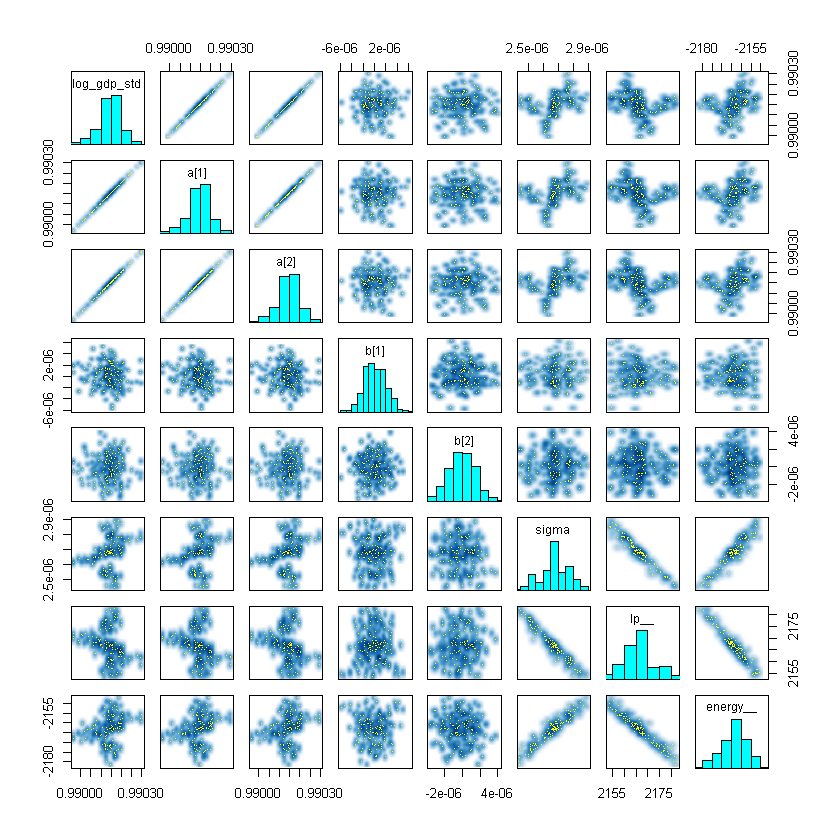

In [9]:
pairs( m9.1@stanfit )

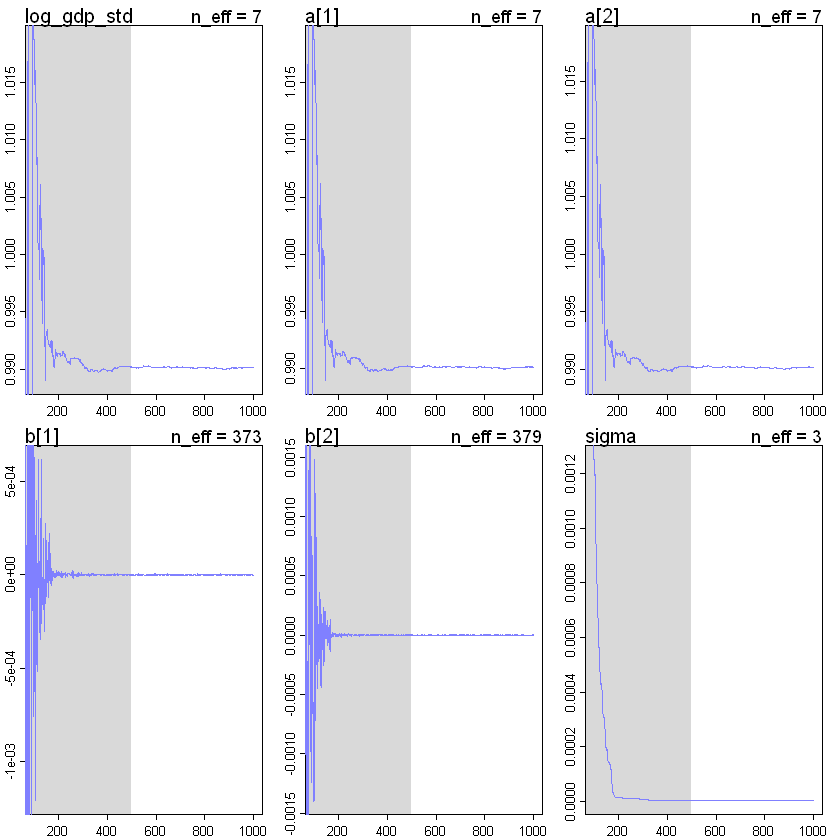

In [8]:
traceplot( m9.1 )

In [ ]:
precis( m9.1 , depth=2 ) %>% round(2)

In [ ]:
show( m9.1 )

In [ ]:
pairs( m9.1 )

## Care and feeding of your Markov chain

## Summary

## Practice

##### Easy

Only (3) is required.

**<font color = 'purple' style='background-color: lightyellow'>8E2. Gibbs sampling is more efficient than the Metropolis algorithm. How does it achieve this extra efficiency? Are there any limitations to the Gibbs sampling strategy?</font>**

Gibbs sampling requires that we use special priors that are conjugate with the likelihood. 

* This means that holding all the other parameters constant, it is possible to derive analytical solutions for the posterior distribution of each parameter. 

* These conditional distributions are used to make smart proposals for jumps in the Markov chain. 

* <font color = 'red'>Gibbs sampling is limited both by the necessity to use conjugate priors, as well as its tendency to get stuck in small regions of the posterior when the posterior distribution has either highly correlated parameters or high dimension</font>.

**<font color = 'purple' style='background-color: lightyellow'>8E3. Which sort of parameters can Hamiltonian Monte Carlo not handle? Can you explain why?</font>**

Hamiltonian Monte Carlo cannot handle discrete parameters. This is because it requires a smooth surface to glide its imaginary particle over while sampling from the posterior distribution.

**<font color = 'purple' style='background-color: lightyellow'>8E4. Explain the difference between the effective number of samples, n_eff as calculated by Stan, and the actual number of samples.</font>**

better than random samples of the function contours. 

8E4. The effect number of samples n_eff is an <font color = 'blue'>estimate of the number of completely independent samples that would hold equivalent information about the posterior distribution</font>. 

* It is always smaller than the actual number of samples, because samples from a Markov chain tend to sequentially correlated or autocorrelated. 

* As autocorrelation rises, n_eff gets smaller. At the limit of perfect autocorrelation, for example, all samples would have the same value and n_eff would be equal to 1, no matter the actual number of samples drawn.

**<font color = 'purple' style='background-color: lightyellow'>8E5. Which value should Rhat approach, when a chain is sampling the posterior distribution correctly?</font>**

8E5. Rhat should approach 1. How close should it get? People disagree, but it is common to judge that <font color = 'blue'>any value less than 1.1 indicates convergence. But like all heuristic indicators, Rhat can be fooled.</font>

**<font color = 'purple' style='background-color: lightyellow'>8E6. Sketch a good trace plot for a Markov chain, one that is effectively sampling from the posterior distribution. What is good about its shape? Then sketch a trace plot for a malfunctioning Markov chain. What about its shape indicates malfunction?</font>**

8E6. <font color = 'blue'>A healthy Markov chain should be both stationary and well-mixing</font>. The first is necessary for inference. The second is desirable, because it means the chain is more efficient. 

A chain that is both of these things should resemble horizontal noise. A chain that is malfunctioning, as the problem asks, would not be stationary. <font color = 'blue'>THis means it is not converging to the target distribution, the posterior distribution</font>. Examples were provided in the chapter. A virtue of Hamiltonian Monte Carlo is that it makes such chains very obvious: they tend to be rather flat wandering trends. Sometimes they are perfectly flat. 

The best test of convergence is always to compare multiple chains. So the best sketch of a malfunctioning trace plot would be one that shows multiple chains wandering into different regions of the parameter space. Figure 8.7 in the chapter, left side, provides an example.

##### Medium

**<font color = 'purple' style='background-color: lightyellow'>8M1. Re-estimate the terrain ruggedness model from the chapter, but now using a uniform prior and an exponential prior for the standard deviation, sigma. The uniform prior should be dunif(0,10) and the exponential should be dexp(1). Do the different priors have any detectible influence on the posterior distribution?</font>**

In [2]:
# load and rep data 7.1
# library(rethinking)
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]

dd.trim <- dd[ , c("log_gdp","rugged","cont_africa") ]

In [3]:
# new model with uniform prior on sigma
m8.1_unif <- map2stan(
    alist(
        log_gdp ~ dnorm(mu,sigma),
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dunif(0,10)
    ),
    data=dd.trim , chains=2 )


SAMPLING FOR MODEL 'bd26149503beddf8dc469911ea270182' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.337 seconds (Warm-up)
Chain 1:                0.312 seconds (Sampling)
Chain 1:       

Computing WAIC


In [4]:
m8.1_unif %>% precis

,mean,sd,5.5%,94.5%,n_eff,Rhat
a,9.2234466,0.14021921,8.9955962,9.44723369,890.3668,1.0007796
bR,-0.2042282,0.07786305,-0.3271945,-0.08108495,918.6120,1.0018062
bA,-1.9445261,0.22983262,-2.3132160,-1.58226218,974.8050,1.0031165
bAR,0.3962788,0.13301770,0.1874993,0.60023162,945.0240,1.0036934
sigma,0.9492472,0.05236843,0.8700220,1.03355972,1330.7277,0.9996952


In [8]:
# new model with uniform prior on sigma
m8.1_unif_u <- ulam(
    alist(
        log_gdp ~ dnorm(mu,sigma),
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dunif(0,10)
    ),
    data=dd.trim , chains=4, log_lik=TRUE)


SAMPLING FOR MODEL '584f8ee6daf764d25322e2f8555e6cf5' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: normal_lpdf: Scale parameter is -1.24028, but must be > 0!  (in 'model3a1c49982542_584f8ee6daf764d25322e2f8555e6cf5' at line 23)

Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000

In [9]:
m8.1_unif_u %>% precis

,mean,sd,5.5%,94.5%,n_eff,Rhat
a,9.2182097,0.13969354,8.9976971,9.44063933,828.6575,1.001829
bR,-0.1990373,0.07774897,-0.3256420,-0.07685226,851.1853,1.001303
bA,-1.9360912,0.23301551,-2.3040562,-1.56397531,1089.1012,1.000870
bAR,0.3847616,0.13538440,0.1732993,0.60559486,964.0078,1.000943
sigma,0.9541927,0.05329153,0.8744828,1.04380764,1260.4326,1.000334


In [10]:
compare(m8.1_unif, m8.1_unif_u)

Warning message in compare(m8.1_unif, m8.1_unif_u):
"Not all model fits of same class.
This is usually a bad idea, because it implies they were fit by different algorithms.
Check yourself, before you wreck yourself."

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m8.1_unif,469.5416,5.236353,0.0000000,0.5235773,14.83634,NA
m8.1_unif_u,469.7303,5.271116,0.1887581,0.4764227,14.68413,0.313468


In [19]:
m8.1_exp <- ulam(
    alist(
        log_gdp ~ dnorm(mu,sigma),
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dexp(1)
    ),
    data=dd.trim , chains=2, log_lik=TRUE )

recompiling to avoid crashing R session



SAMPLING FOR MODEL 'c7cd5274fc85d36b6de85525eca847e6' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.252 seconds (Warm-up)
Chain 1:                0.193 seconds (Sampling)
Chain 1:                0.

In [12]:
m8.1_exp %>% precis

,mean,sd,5.5%,94.5%,n_eff,Rhat
a,9.2252473,0.14783519,9.0030422,9.46543625,431.0332,1.003409
bR,-0.2031874,0.08112668,-0.3383518,-0.08233731,442.3633,1.003280
bA,-1.9529092,0.23058480,-2.3272978,-1.58386200,487.0761,1.004495
bAR,0.3955915,0.13525467,0.1874293,0.60081656,551.4056,1.003435
sigma,0.9488083,0.05175575,0.8763723,1.03466642,676.9862,1.003069


In [13]:
compare(m8.1_exp, m8.1_unif_u)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m8.1_unif_u,469.7303,5.271116,0.0000000,0.5511197,14.68413,NA
m8.1_exp,470.1407,5.549436,0.4103912,0.4488803,14.89480,0.3438224


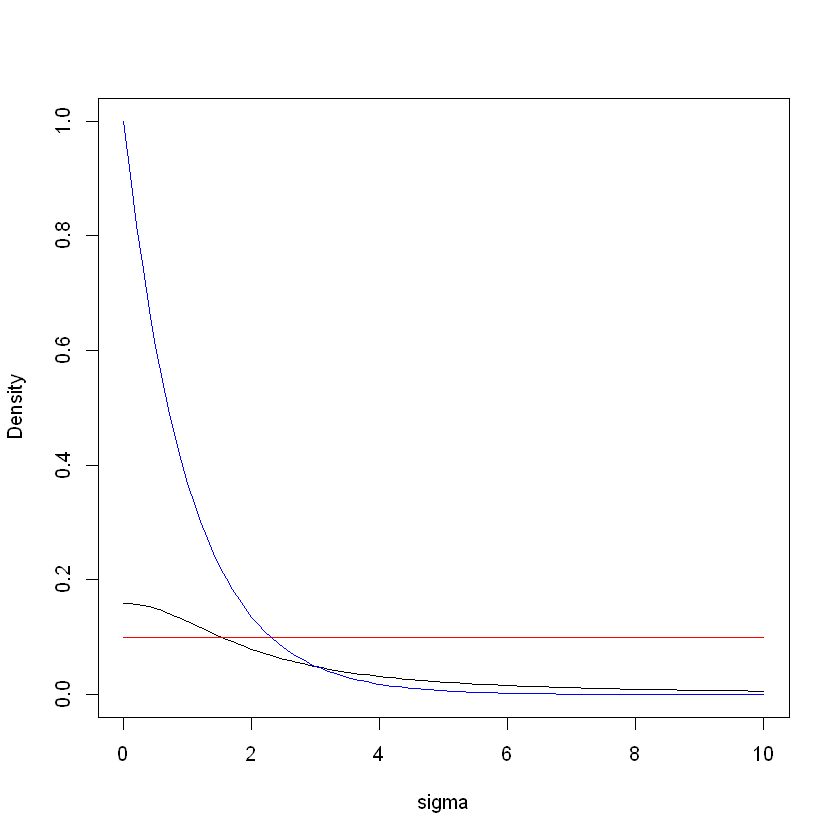

In [14]:
curve( dcauchy(x,0,2) , from=0 , to=10 ,
    xlab="sigma" , ylab="Density" , ylim=c(0,1) )
curve( dunif(x,0,10) , add=TRUE , col="red" )
curve( dexp(x,1) , add=TRUE , col="blue" )

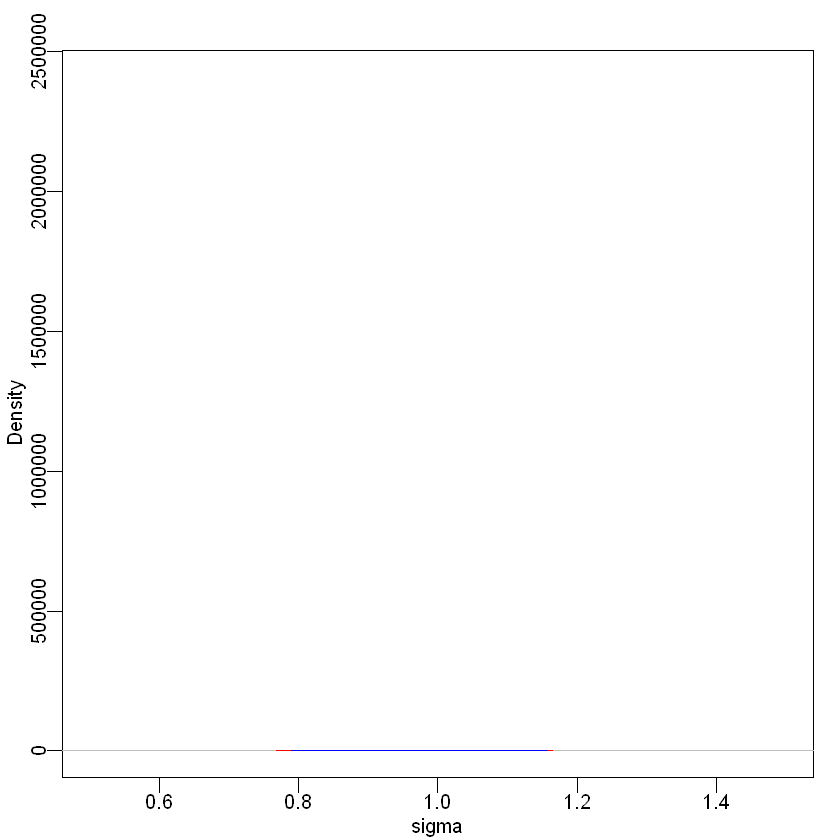

In [18]:
sigma_cauchy <- extract.samples(m9.1,pars="sigma") 
sigma_unif <- extract.samples(m8.1_unif,pars="sigma")
sigma_exp <- extract.samples(m8.1_exp,pars="sigma")
dens( sigma_cauchy[[1]] , xlab="sigma" , xlim=c(0.5,1.5) )
dens( sigma_unif[[1]] , add=TRUE , col="red" )
dens( sigma_exp[[1]] , add=TRUE , col="blue" )

# Misc

## 1st edition MAP2STAN code

In [8]:
## R code 8.2
# library(rethinking)
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]

In [11]:
## R code 8.3
m8.1 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa ,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dunif(0,10)
    ) ,
    data=dd )
precis(m8.1) %>% round(2)

,mean,sd,5.5%,94.5%
a,9.22,0.14,9.00,9.44
bR,-0.20,0.08,-0.32,-0.08
bA,-1.95,0.22,-2.31,-1.59
bAR,0.39,0.13,0.19,0.60
sigma,0.93,0.05,0.85,1.01


In [12]:
## R code 8.4
dd.trim <- dd[ , c("log_gdp","rugged","cont_africa") ]
str(dd.trim)

'data.frame':	170 obs. of  3 variables:
 $ log_gdp    : num  7.49 8.22 9.93 9.41 7.79 ...
 $ rugged     : num  0.858 3.427 0.769 0.775 2.688 ...
 $ cont_africa: int  1 0 0 0 0 0 0 0 0 1 ...


In [13]:
## R code 8.5
m8.1stan <- map2stan(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa ,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dcauchy(0,2)
    ) ,
    data=dd.trim )


SAMPLING FOR MODEL 'dac9105512b08203d25926c0708d3760' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.395 seconds (Warm-up)
Chain 1:                0.355 seconds (Sampling)
Chain 1:       

Computing WAIC


In [17]:
## R code 8.6
precis(m8.1stan) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
a,9.21,0.15,8.97,9.43,335.75,1.01
bR,-0.20,0.08,-0.32,-0.06,353.19,1.00
bA,-1.93,0.24,-2.32,-1.55,429.51,1.00
bAR,0.39,0.13,0.17,0.60,455.95,1.00
sigma,0.95,0.05,0.87,1.03,659.69,1.00


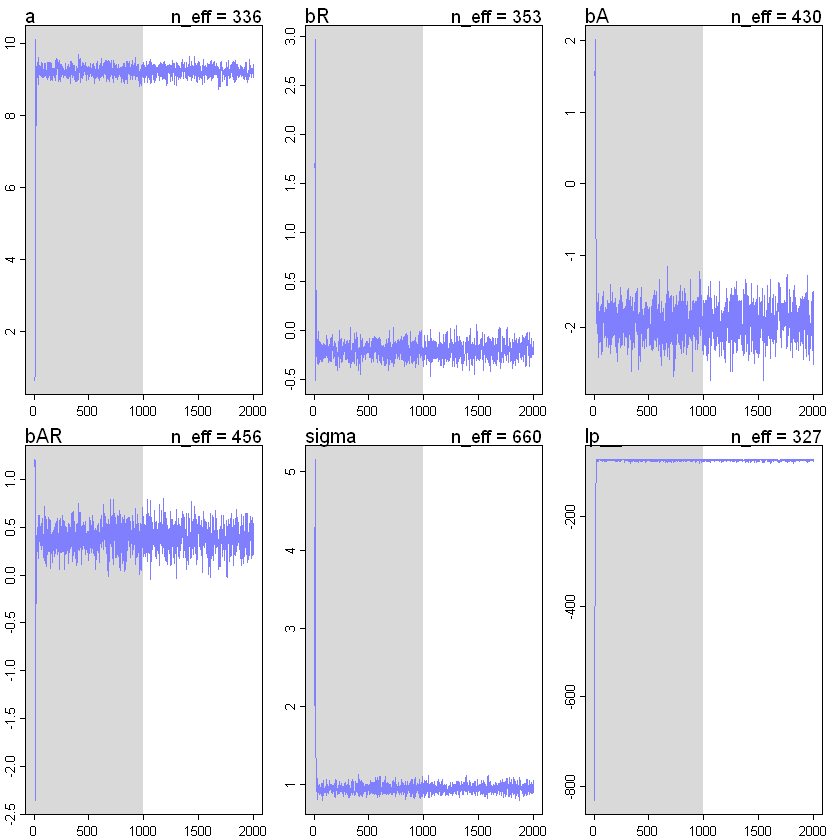

In [22]:
plot( m8.1stan )

## Setup

https://en.wikipedia.org/wiki/Log_probability

In [ ]:
sessionInfo()

In [ ]:
find_rtools()

## buffer

In [ ]:
## R code 9.1
num_weeks <- 1e5
positions <- rep(0,num_weeks)
current <- 10
for ( i in 1:num_weeks ) {
    # record current position
    positions[i] <- current

    # flip coin to generate proposal
    proposal <- current + sample( c(-1,1) , size=1 )
    # now make sure he loops around the archipelago
    if ( proposal < 1 ) proposal <- 10
    if ( proposal > 10 ) proposal <- 1

    # move?
    prob_move <- proposal/current
    current <- ifelse( runif(1) < prob_move , proposal , current )
}

## R code 9.2
D <- 10
T <- 1e3
Y <- rmvnorm(T,rep(0,D),diag(D))
rad_dist <- function( Y ) sqrt( sum(Y^2) )
Rd <- sapply( 1:T , function(i) rad_dist( Y[i,] ) )
dens( Rd )

## R code 9.3
# U needs to return neg-log-probability
myU4 <- function( q , a=0 , b=1 , k=0 , d=1 ) {
    muy <- q[1]
    mux <- q[2]
    U <- sum( dnorm(y,muy,1,log=TRUE) ) + sum( dnorm(x,mux,1,log=TRUE) ) +
        dnorm(muy,a,b,log=TRUE) + dnorm(mux,k,d,log=TRUE)
    return( -U )
}

## R code 9.4
# gradient function
# need vector of partial derivatives of U with respect to vector q
myU_grad4 <- function( q , a=0 , b=1 , k=0 , d=1 ) {
    muy <- q[1]
    mux <- q[2]
    G1 <- sum( y - muy ) + (a - muy)/b^2 #dU/dmuy
    G2 <- sum( x - mux ) + (k - mux)/d^2 #dU/dmuy
    return( c( -G1 , -G2 ) ) # negative bc energy is neg-log-prob
}
# test data
set.seed(7)
y <- rnorm(50)
x <- rnorm(50)
x <- as.numeric(scale(x))
y <- as.numeric(scale(y))